In [2]:
#Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib import patches as patches
from matplotlib.dates import DateFormatter
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from datetime import date, timedelta, datetime,time
import sqlite3
import os

#Importing the weather data and the occupants per hour
weather_log_2018 = pd.read_csv('../input/weather-log-2018/weather_log_2018.csv')
occupant_log_2018 = pd.read_csv('../input/occupant-log-2018/Occupants_2018.csv')

In [3]:
#Dropping the placeholder columns created by each dataset
weather_log_2018 = weather_log_2018.drop(columns = ['time', 'Unnamed: 0'])
occupant_log_2018 = occupant_log_2018.drop(columns = {'Unnamed: 0'})

#Ensuring both 'realtime' columns are a datetime type, as that's what we're merging these two sets on
weather_log_2018['realtime'] =  pd.to_datetime(weather_log_2018['realtime'])
occupant_log_2018['realtime'] =  pd.to_datetime(occupant_log_2018['realtime'])

In [4]:
#Merging both datasets together
df_combined = pd.merge(weather_log_2018, occupant_log_2018, on='realtime', how='left')
df_combined.set_index('realtime')

,summary,icon,precipIntensity,precipProbability,precipType,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,Occupants,Date,Time,Day,Weekday,Month
realtime,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,Partly Cloudy,partly-cloudy-day,0.0,0.0,0,3.08,1.41,-0.43,0.78,1024.72,1.76,NaN,13,0.39,0,16.093,0,1/1/2018,0,1,0,1
2018-01-01 01:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,0,2.47,0.27,-0.42,0.81,1024.84,2.13,NaN,7,0.57,0,16.093,0,1/1/2018,1,1,0,1
2018-01-01 02:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,0,2.04,0.02,-0.55,0.83,1024.86,1.91,NaN,9,0.59,0,16.093,0,1/1/2018,2,1,0,1
2018-01-01 03:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,0,1.91,-0.09,-0.49,0.84,1024.92,1.88,NaN,20,0.50,0,16.093,0,1/1/2018,3,1,0,1
2018-01-01 04:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,0,1.82,-0.22,-0.44,0.85,1025.02,1.90,NaN,16,0.66,0,16.093,0,1/1/2018,4,1,0,1
2018-01-01 05:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,0,1.88,-0.07,-0.35,0.85,1025.57,1.83,NaN,8,0.74,0,16.093,0,1/1/2018,5,1,0,1
2018-01-01 06:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,0,1.74,0.10,-0.43,0.85,1025.82,1.59,NaN,26,0.70,0,16.093,0,1/1/2018,6,1,0,1
2018-01-01 07:00:00,Mostly Cloudy,partly-cloudy-night,0.0,0.0,0,1.60,-0.15,-0.52,0.86,1026.47,1.66,NaN,14,0.54,0,13.978,0,1/1/2018,7,1,0,1
2018-01-01 08:00:00,Partly Cloudy,partly-cloudy-night,0.0,0.0,0,1.49,0.07,-0.57,0.86,1026.78,1.42,NaN,10,0.13,0,13.115,0,1/1/2018,8,1,0,1


In [6]:
df_combined = df_combined.drop(columns = {'windGust'})

KeyError: "['windGust'] not found in axis"

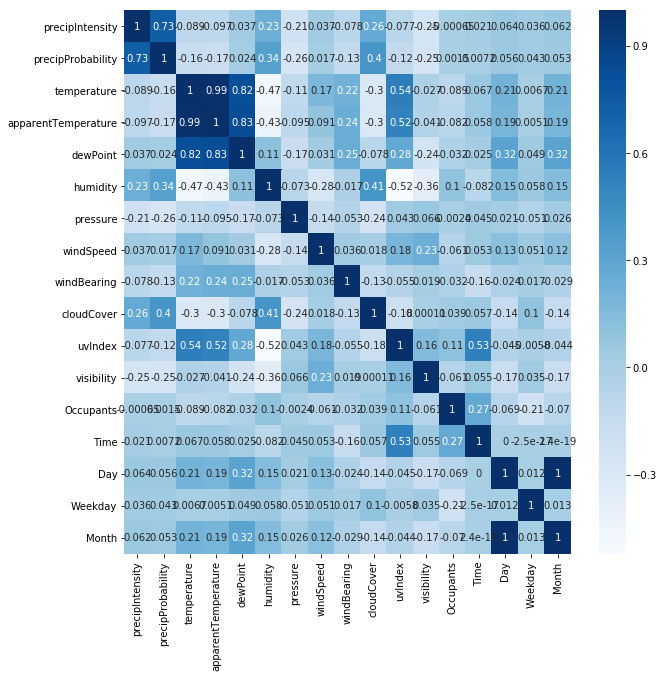

In [7]:
#Plotting heatmap to see correlations with Occupants
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_combined.corr(), annot=True, cmap='Blues')

In [8]:
#Setting up targets, features, and splitting up the data
targets = df_combined['Occupants']
features = df_combined.drop(columns = {'Occupants', 'realtime', 'precipType', 'icon', 'summary', 'Date'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [9]:
#Determining prediction score with Random Forest
forest = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test))*100
forest_score

67.02706267084449